In [ ]:
! jupyter kernelspec list

In [ ]:
! jupyter kernelspec list --json


### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [1]:
import import_ipynb

import numpy as nm

import pandas as ps   

import yfinance as fc

import seaborn as sb 
import matplotlib.pyplot as mpl   
%matplotlib inline 

In [3]:
stocks = input("Enter the code of the stock:- ") 
valuee = fc.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
valuee.head()

Enter the code of the stock:- goog
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  \
Date                                                                    
2008-01-02 00:00:00-05:00  17.257067  17.369146  16.879980  17.065783   
2008-01-03 00:00:00-05:00  17.067528  17.107128  16.849842  17.069269   
2008-01-04 00:00:00-05:00  16.928797  16.960428  16.313852  16.363665   
2008-01-07 00:00:00-05:00  16.287451  16.495173  15.874249  16.170637   
2008-01-08 00:00:00-05:00  16.264038  16.437389  15.716092  15.733029   

                              Volume  
Date                                  
2008-01-02 00:00:00-05:00  172921733  
2008-01-03 00:00:00-05:00  130587647  
2008-01-04 00:00:00-05:00  215195594  
2008-01-07 00:00:00-05:00  257096061  
2008-01-08 00:00:00-05:00  214364490

In [4]:
valuee.shape 

(3284, 5)

In [5]:
valuee.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3284 entries, 2008-01-02 00:00:00-05:00 to 2021-01-15 00:00:00-05:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3284 non-null   float64
 1   High    3284 non-null   float64
 2   Low     3284 non-null   float64
 3   Close   3284 non-null   float64
 4   Volume  3284 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 153.9 KB


In [6]:
valuee.describe()

Open         High          Low        Close        Volume
count  3284.000000  3284.000000  3284.000000  3284.000000  3.284000e+03
mean     32.364323    32.673558    32.053406    32.372446  8.394522e+07
std      20.513887    20.732425    20.325810    20.539325  8.170115e+07
min       6.538243     6.709103     6.159413     6.411966  1.584340e+05
25%      14.537136    14.651333    14.376488    14.496725  3.011600e+07
50%      26.894834    27.060455    26.679701    26.893206  5.619303e+07
75%      49.000000    49.354126    48.630500    48.952625  1.064074e+08
max      91.225998    92.360001    91.132500    91.399498  9.349835e+08

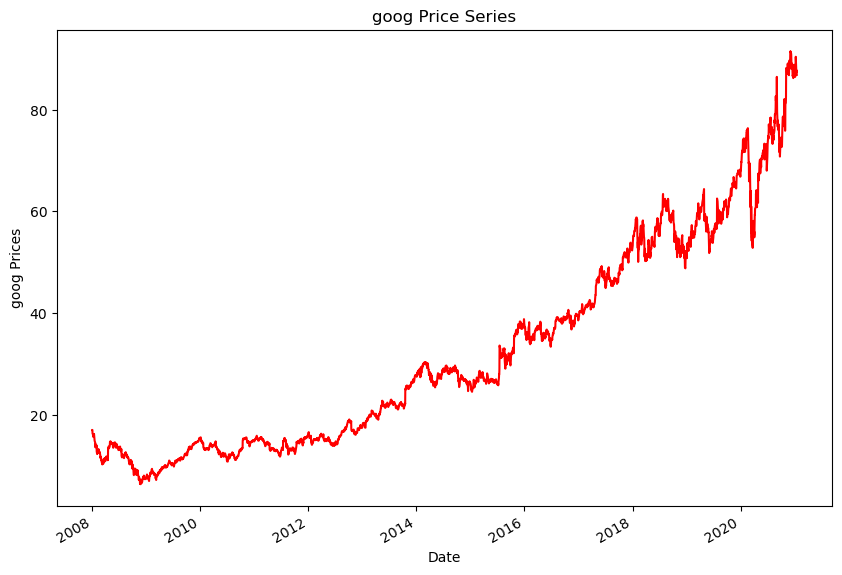

In [7]:
valuee.Close.plot(figsize=(10, 7),color='r')
mpl.ylabel("{} Prices".format(stocks))
mpl.title("{} Price Series".format(stocks))
mpl.show()

C:\Users\agarw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

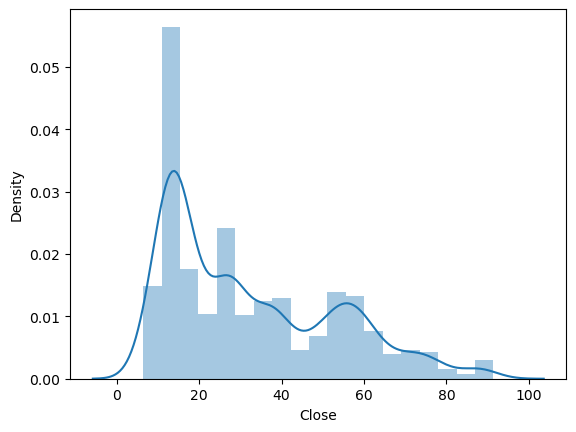

In [8]:
sb.distplot(valuee["Close"])

C:\Users\agarw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

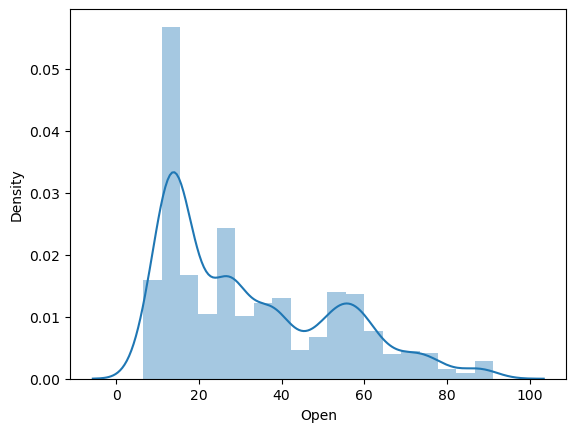

In [9]:
sb.distplot(valuee["Open"])

C:\Users\agarw\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

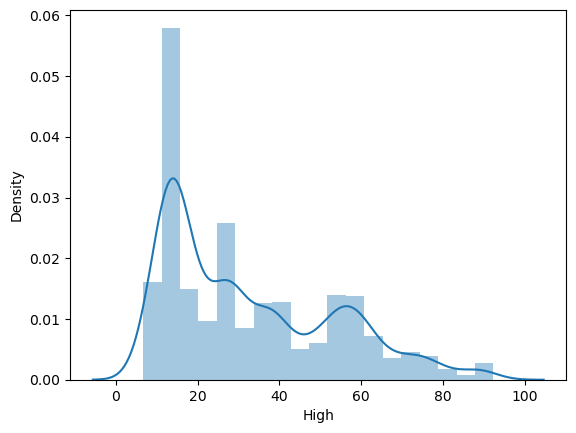

In [10]:
sb.distplot(valuee["High"])

In [11]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = valuee.drop("Close", axis=1) 
y = valuee["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2627, 4)
(657, 4)
(2627,)
(657,)


In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pre1 = lr.predict(X_test)

In [13]:
# MSE -- > Mean Squared  
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = nm.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pre1)

MSE:-  0.060934570249545836
RMSE:-  0.24684928650807528
R2_score:-  0.999869069400377


In [14]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

C:\Users\agarw\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.167e+02, tolerance: 1.079e+02
  model = cd_fast.enet_coordinate_descent(
C:\Users\agarw\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.28082e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [15]:
calculate_metrics(y_test, la_p)

MSE:-  0.21961921324078537
RMSE:-  0.4686354801343848
R2_score:-  0.9995281024357671


In [16]:
calculate_metrics(y_test, ri_p)

MSE:-  0.06092526676149017
RMSE:-  0.2468304413185095
R2_score:-  0.9998690893908564


In [17]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.037 total time=   0.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.065 total time=   0.4s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.064 total time=   0.4s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.074 total time=   0.4s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.105 total time=   0.3s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.037 total time=   0.3s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.065 total time=   0.3s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.064 total time=   0.3s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.074 total time=   0.3s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.105 total time=   0.3s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.037 total time=   0.3s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.000 total time=   0.5s
[CV 3/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.001 total time=   0.5s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.002 total time=   0.5s
[CV 5/5] END ......C=1000, gamma=1, kernel=rbf;, score=-0.004 total time=   0.5s
[CV 1/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.5s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.002 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.001 total time=   0.5s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.005 total time=   0.5s
[CV 5/5] END ....C=1000, gamma=0.1, kernel=rbf;, score=-0.002 total time=   0.5s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.001 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.006 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.002 total time=   0.5s
[CV 4/5] END ....C=1000, gam

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [18]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [19]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")

In [20]:
def preprocess(Open,High,Low,Volume):
    test_data=nm.array([[Open,High,Low,Volume]])
    trained_model=joblib.load("model.pkl")
    prediction=trained_model.predict(test_data)
    return prediction
t=preprocess(100,120,90,100)
print(t)

[107.29177387]


C:\Users\agarw\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
